In [1]:
import os
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from timeit import default_timer as timer
from IPython.display import clear_output

In [2]:

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [3]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []    
    for i in range(len(X) - time_steps):
        clear_output(wait=True)
        print('modeling to keras ',round((i/(len(X) - time_steps))*100,2), ('%'), end='')
        s = round(timer() - start)
        if(s>60):
            s /=60
            print(' ', s, ' seconds')
        v = X.iloc[i: (i+time_steps), 2:4].to_numpy()
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)

In [4]:
#carregando datasets
print('loading dataset...')
train = pd.read_csv('../datasets/com_concept_drift/sdn_train_unormalized.csv')
test = pd.read_csv('../datasets/com_concept_drift/sdn_test_unormalized.csv')

train = train[train.delay>=0]
test = test[test.delay>=0]

train = train[train.delay<=10000] 
test = test[test.delay<=10000] 



loading dataset...


In [5]:
start = timer()
print('creating window')
TIME_STEPS = 1
X_train,Y_train = create_dataset(train, train.delay, time_steps=TIME_STEPS)
X_test,Y_test = create_dataset(test, test.delay, time_steps=TIME_STEPS)

print('2D to 3D duration: ', round(timer() - start))

modeling to keras  97.01 %  10.566666666666666  seconds


# setting LSTM

In [90]:
print('Init config LSTM')
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
        keras.layers.LSTM(
             activation="relu",
            units=40,
            input_shape=(X_train.shape[1],X_train.shape[2]
                        
                        
                        )
        )
    ))
model.add(keras.layers.Dense(units=40, activation="relu"))
model.add(keras.layers.Dense(units=40, activation="relu"))
model.add(keras.layers.Dense(units=40, activation="relu"))
model.add(keras.layers.Dense(units=40, activation="relu"))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))

Init config LSTM


# compiling

In [91]:
loss ="mse"
optim = tf.keras.optimizers.Adam(
    learning_rate=0.0001)
metrics=["accuracy"]

model.compile(loss=loss, optimizer=optim, 
             metrics=metrics
             )

# training 

In [92]:
print('Init Train')
start = timer()
history = model.fit(
    X_train, Y_train, 
    epochs=100, 
    batch_size= 5,
    validation_split=0.1,
    shuffle=False,
#     callbacks=[tensorboard_callback]
)
print('trraining duration: ',round(timer() - start))

Init Train
Epoch 1/100
9989/9989 [==============================] - 41s 4ms/step - loss: 14446.4629 - accuracy: 0.6248 - val_loss: 19142.9727 - val_accuracy: 0.0000e+00
Epoch 2/100
9989/9989 [==============================] - 33s 3ms/step - loss: 13945.0576 - accuracy: 0.3261 - val_loss: 18995.6562 - val_accuracy: 0.0000e+00
Epoch 3/100
9989/9989 [==============================] - 31s 3ms/step - loss: 5106.7017 - accuracy: 0.4037 - val_loss: 50430.7773 - val_accuracy: 0.0000e+00
Epoch 4/100
9989/9989 [==============================] - 32s 3ms/step - loss: 1986.9736 - accuracy: 0.5973 - val_loss: 25435.4355 - val_accuracy: 0.0000e+00
Epoch 5/100
9989/9989 [==============================] - 31s 3ms/step - loss: 2013.7777 - accuracy: 0.5603 - val_loss: 9460.5420 - val_accuracy: 0.0000e+00
Epoch 6/100
9989/9989 [==============================] - 30s 3ms/step - loss: 2118.8599 - accuracy: 0.5261 - val_loss: 2776.7876 - val_accuracy: 0.0000e+00
Epoch 7/100
9989/9989 [========================

9989/9989 [==============================] - 30s 3ms/step - loss: 2096.3086 - accuracy: 0.7132 - val_loss: 870.3615 - val_accuracy: 0.9908
Epoch 55/100
9989/9989 [==============================] - 29s 3ms/step - loss: 2095.0732 - accuracy: 0.6955 - val_loss: 844.3519 - val_accuracy: 0.9908
Epoch 56/100
9989/9989 [==============================] - 29s 3ms/step - loss: 2190.7085 - accuracy: 0.6547 - val_loss: 893.9013 - val_accuracy: 0.9908
Epoch 57/100
9989/9989 [==============================] - 30s 3ms/step - loss: 2172.2209 - accuracy: 0.6993 - val_loss: 892.0501 - val_accuracy: 0.9908
Epoch 58/100
9989/9989 [==============================] - 31s 3ms/step - loss: 2094.6301 - accuracy: 0.6988 - val_loss: 903.0740 - val_accuracy: 0.9908
Epoch 59/100
9989/9989 [==============================] - 31s 3ms/step - loss: 1994.8038 - accuracy: 0.6883 - val_loss: 842.7395 - val_accuracy: 0.9908
Epoch 60/100
9989/9989 [==============================] - 31s 3ms/step - loss: 2203.1875 - accuracy: 

# saving model

In [93]:
print('Saving Model')
model.save('models/lstm')

Saving Model
INFO:tensorflow:Assets written to: models/lstm\assets


INFO:tensorflow:Assets written to: models/lstm\assets


# loss training

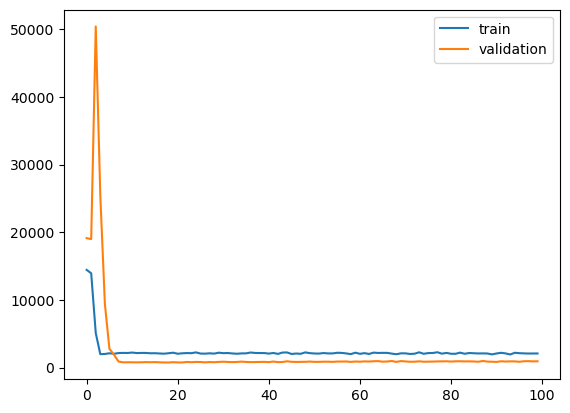

In [94]:

fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='validation')
ax1.legend();

# accuracy

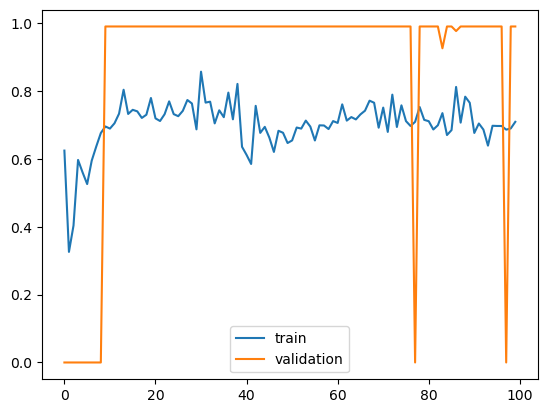

In [95]:

fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(history.history['accuracy'], label='train')
ax1.plot(history.history['val_accuracy'], label='validation')
ax1.legend();

# predicting

In [96]:
y_pred = model.predict(X_test)

# unormalizing 

In [97]:
f_columns = ['temperature','label']
scaler1 = StandardScaler().fit(train[f_columns])
scaler2 = StandardScaler().fit(train[f_columns])

scaler1= scaler1.fit(train[f_columns].to_numpy())
scaler2 = scaler2.fit(train[['delay']])


#normalizando test
scaler3 = StandardScaler().fit(test[f_columns])
scaler4 = StandardScaler().fit(test[f_columns])

scaler3 = scaler3.fit(test[f_columns].to_numpy())
scaler4 = scaler4.fit(test[['delay']])


In [98]:
y_test_inv = scaler4.inverse_transform(Y_test.reshape(1,-1))
y_pred_inv = scaler4.inverse_transform(y_pred)

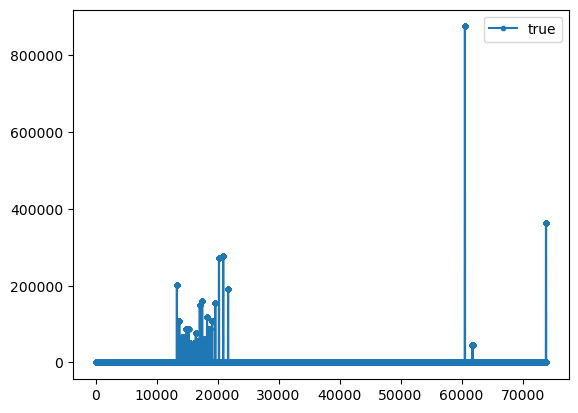

In [99]:
fig2 = plt.figure()
a2 = fig2.add_subplot(1,1,1)
a2.plot(y_test_inv.flatten(), marker='.', label='true')
a2.legend();

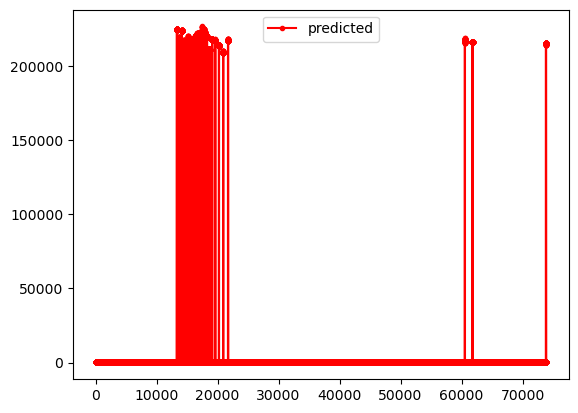

In [100]:
fig3 = plt.figure()
a3 = fig3.add_subplot(1,1,1)
a3.plot(y_pred_inv.flatten(),'r',marker='.', label='predicted')
a3.legend();


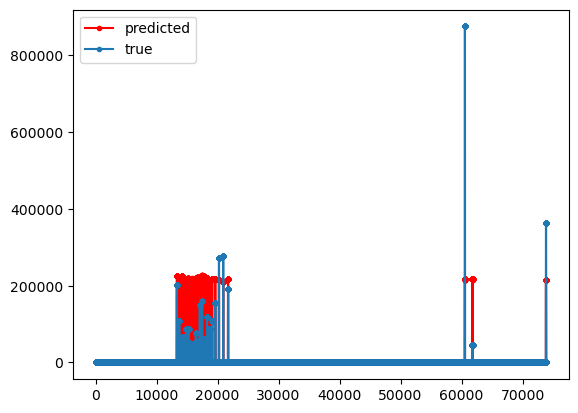

In [101]:
fig4 = plt.figure()
a4 = fig4.add_subplot(1,1,1)
a4.plot(y_pred_inv.flatten(),'r',marker='.', label='predicted')
a4.plot(y_test_inv.flatten(), marker='.', label='true')
a4.legend();

In [102]:
y_pred_inv.shape

(73897, 1)

In [110]:
l1 = []
l2 = []
for i in np.arange(y_pred_inv.shape[0]):
    clear_output(wait=True)
    print('progress ',round((i/y_pred_inv.shape[0])*100,2), ('%'))
    if(y_pred_inv[i,0]<=350000):
        l1.append(y_pred_inv[i,0])
    if(y_test_inv[0,i]<=350000):
        l2.append(y_test_inv[0,i])

y_pred_inv2 = np.array(l1)
y_test_inv2 = np.array(l2)

progress  99.52 %


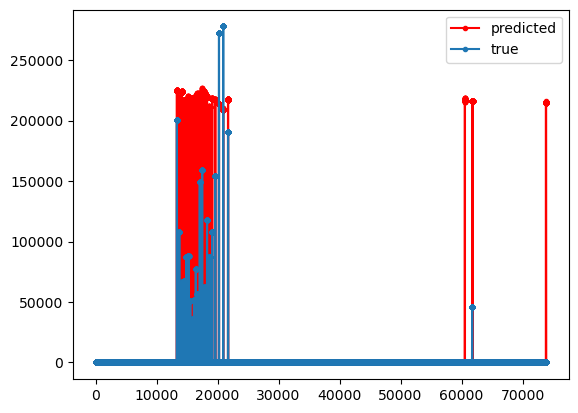

In [111]:



plt.plot(y_pred_inv2.flatten(),'r',marker='.', label='predicted')
plt.plot(y_test_inv2.flatten(), marker='.', label='true')
plt.legend();

In [105]:
y_pred_inv2

array([71.63351, 71.81954, 72.19115, ..., 57.67888, 57.60714, 57.67888],
      dtype=float32)

In [106]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error


In [108]:
rmse =  mean_squared_error(y_test_inv2, y_pred_inv2[0:73797], squared=False)
mae =  mean_absolute_error(y_test_inv2, y_pred_inv2[0:73797])
median_mae = median_absolute_error(y_test_inv2, y_pred_inv2[0:73797])
msle = mean_squared_log_error(y_test_inv2, y_pred_inv2[0:73797])

print(rmse)
print(mae)
print(median_mae)


53.46071355599856
52.4431239749895
50.11523678384778


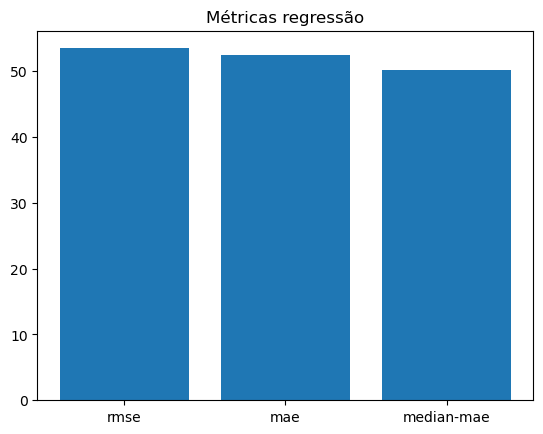

In [109]:
objects = ('rmse', 'mae', 'median-mae')
y_pos = np.arange(3)
performance = [rmse,mae,median_mae]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
#plt.ylabel('Usage')
plt.title('Métricas regressão')

plt.show()

In [ ]:
objects = ('msle')
y_pos = np.arange(2)
performance = [msle]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
#plt.ylabel('Usage')
plt.title('Métricas regressão')

plt.show()

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt